<a href="https://colab.research.google.com/github/devipuspitaaa/ProjectPCVK_DeviFitri/blob/main/ProjectPCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import cv2 as cv


jumlah titik terdeteksi =  1000


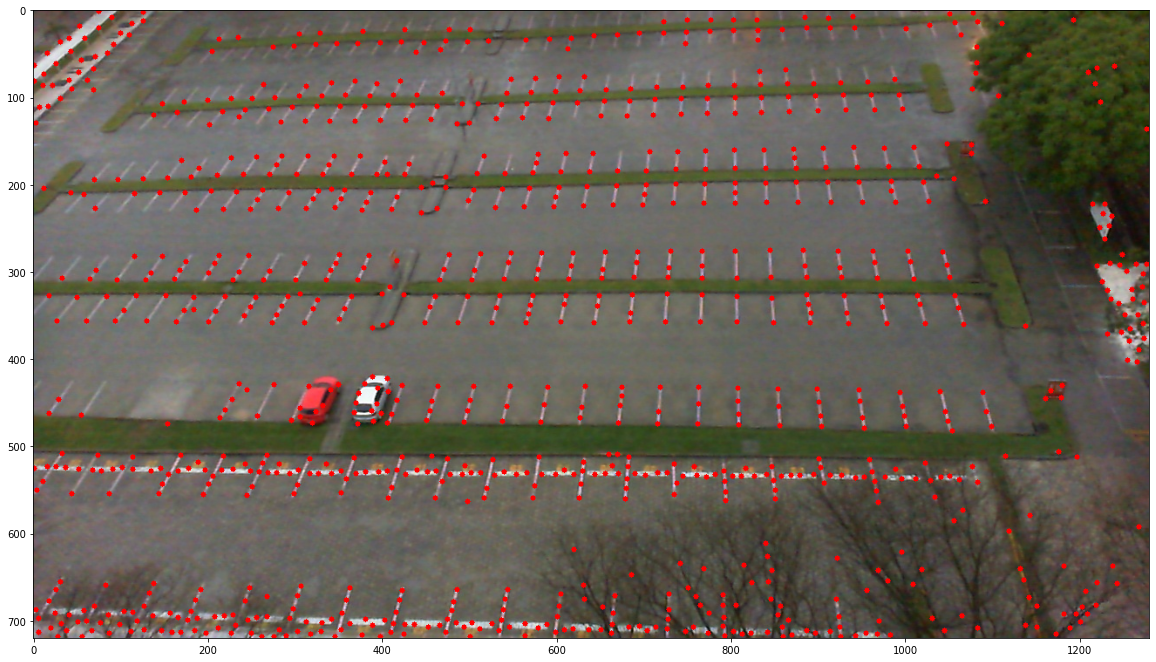

(<matplotlib.image.AxesImage at 0x7f8cc607a090>, None)

In [6]:
# Menggunakan Shi-Tomasi GFTT untuk deteksi ujung (corner detection)

# gunakan gambar yang disediakan 
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-09-21_06_20_11.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 


# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)

# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])

# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv.COLOR_BGR2RGB)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)

# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show()

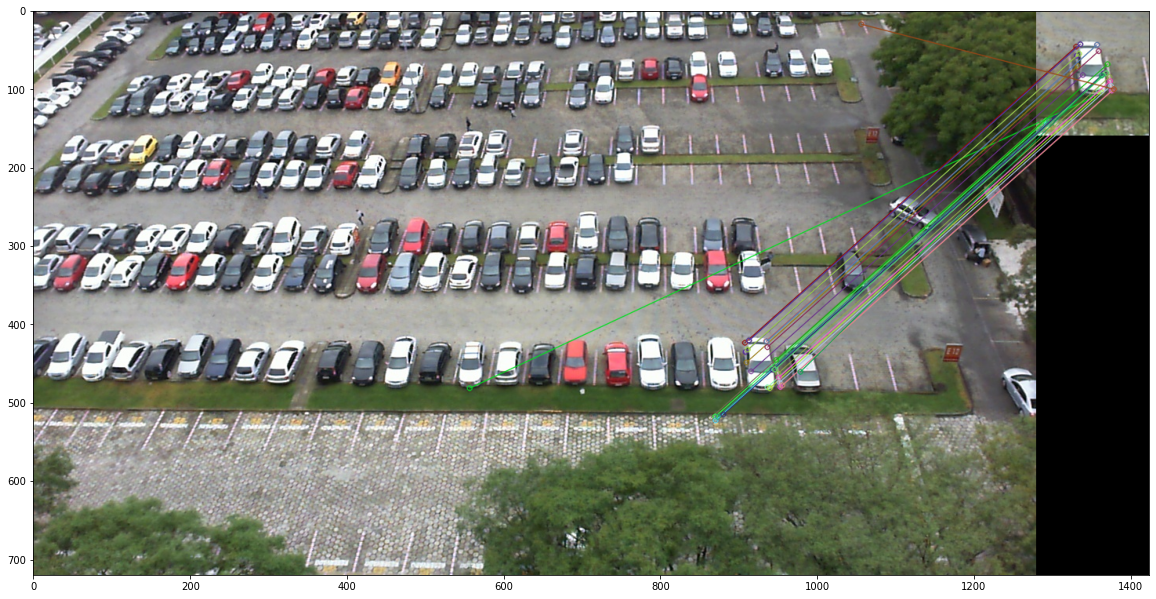

(<matplotlib.image.AxesImage at 0x7f8cc4e33390>, None)

In [10]:
# Contoh Script untuk feature detection and Matching
# Modifikasi script ini untuk mencoba metode yang berbeda 

import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar 
img1 = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/2012-11-10_08_47_45.jpg')          # gambar yang dituju
img2 = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/Car Park/mobilcari.jpg')             # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None

# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()